In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [36]:
data=pd.read_csv("/home/student/Downloads/iris.csv")
print(data.head())
sl_width = data["sepal.width"]

   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa


In [37]:
sl_length = data["sepal.length"]
print(sl_length.head())

0    5.1
1    4.9
2    4.7
3    4.6
4    5.0
Name: sepal.length, dtype: float64


In [38]:
sl_width = data["sepal.width"]
print(sl_width.head())

0    3.5
1    3.0
2    3.2
3    3.1
4    3.6
Name: sepal.width, dtype: float64


In [39]:
#2 Explore the basic statistics of the dataset mean,median,standard deviation,minimum,maximum
means=data["sepal.length"].mean()
medians=data["sepal.length"].median()
mins =data["sepal.length"].min()
maxs =data["sepal.length"].max()
stds =data["sepal.length"].std()

print(means)
print(medians)
print(mins)
print(maxs)
print(stds)

5.843333333333335
5.8
4.3
7.9
0.8280661279778629


Text(0, 0.5, 'Sepal Width')

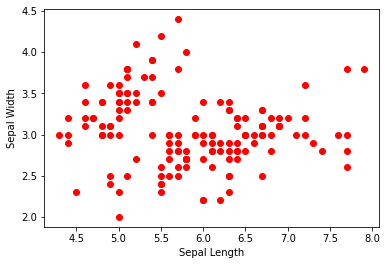

In [40]:
# 3relationship between sepal length and sepal width using scatter plot
plt.scatter(sl_length,sl_width,color='red')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

In [41]:
# 4 add new colum sepal area in dataframe using product of sepal length and sepal width
data['sepal.area'] = data['sepal.length'] * data['sepal.width']
print(data.head())

   sepal.length  sepal.width  petal.length  petal.width variety  sepal.area
0           5.1          3.5           1.4          0.2  Setosa       17.85
1           4.9          3.0           1.4          0.2  Setosa       14.70
2           4.7          3.2           1.3          0.2  Setosa       15.04
3           4.6          3.1           1.5          0.2  Setosa       14.26
4           5.0          3.6           1.4          0.2  Setosa       18.00


In [42]:
# 5 find maximum value of petal width
maxp =data["petal.length"].max()
print(maxp)

6.9


In [48]:
# 6 using pandas group dataset by species and calculate mean sepal length for each group
mean_sepal_length = data.groupby('variety')['sepal.length'].mean().reset_index()
print(mean_sepal_length)

      variety  sepal.length
0      Setosa         5.006
1  Versicolor         5.936
2   Virginica         6.588


In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

In [57]:
# 7 defination of dependent variable and independent variable
x = data[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']]  # Independent variables
y = data['variety']  # Dependent variable

In [58]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [61]:
le= LabelEncoder()
y=le.fit_transform(y)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
model= LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)